# Python's scientific libraries

Following is my attempt to interactively learn how to use popular libraries like numpy, scipy, matplotlib, etc. I will code and try to explore various APIs provided by these awesome libraries.

## What is NumPy?

NumPy is a python library for scientific computations. It provides multidimensional array support with fast operarions on it using compiled C code. NumPy arrays are instances of `ndarray` which are homogenous multidimensional arrays. Let's start by importing NumPy.

In [1]:
import numpy as np

print(np.__version__)

1.15.1


## Features of NumPy

1. ##### Vectorization
In numpy, most of the code resembles standard mathematical operations rather than be composed of messy `for loops`. For example, the product of two arrays in numpy is taken as follows:
$$c = a * b$$
Where c is the resultant array with $c[i] = a[i] * b[i]$.
2. ##### Broadcasting
Operations in numpy are of implicit element by element type as seen above. It refers to how numpy performs operations between arrays of different shapes. To do this, numpy broadcasts the smaller array to make it compatible with the larger one following the rules mentioned [here][1].

[1]: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#module-numpy.doc.broadcasting

## Terminologies

1. NumPy arrays known as ndarray are also aliased by the name **array**.
2. The dimensions are referred to as **axes**.
3. An array that refers to another array’s data instead is called a **view**. For example, we may create a view that only shows every second element of another array. It is better known as shallow copy to Java programmers. This is akin to SQL's views.
4. Any sequence that can be interpreted as an ndarray is called **array_like**. This includes nested lists, tuples, scalars and existing arrays.
5. **C type** array are stored as row major. **Fortran type** arrays are the opposite, stored as column major. In row major form, the rightmost index/dimension refers to the integers stored in the array

## Basics
Let's start with some basic code.

In [2]:
a = np.array([1, 2, 4])
a

array([1, 2, 4])

In [3]:
a.shape, a.ndim, a.size, a.dtype, a.itemsize, a.data # attributes of ndarray class

((3,), 1, 3, dtype('int64'), 8, <memory at 0x7f528d5de588>)

In [4]:
type(a)

numpy.ndarray

### Creating Arrays

In [5]:
b = np.array([             # a 2-d array
    [1, 3, 4], [1, 0 , -1] # np data types include intx, floatx, uintx (unsigned), bool_, 
], dtype = np.int8)        # complex64, complex128; where x is number of bits per element: 8, 16, ...
                           

In [6]:
b.shape, b.size, b.itemsize

((2, 3), 6, 1)

In [7]:
np.zeros([2,3]) # creates a 2 x 3 array and fills it with 0s with dtype = float64

array([[0., 0., 0.],
       [0., 0., 0.]])

In [8]:
np.ones([1, 7], dtype = np.bool_)

array([[ True,  True,  True,  True,  True,  True,  True]])

In [9]:
np.empty([1, 3]) # randomly initialized contents

array([[6.91655748e-310, 6.91655748e-310, 0.00000000e+000]])

In [10]:
np.arange(23) == np.array(range(23)) # arange() creates array similar to python's range

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

^Even the comparison operation is vectorized...

To have a normal comparison, we can use `all` function

In [11]:
np.all(np.arange(23) == np.array(range(23)))

True

In [12]:
np.arange(0, 1, 0.333333333333333333) # arange unlike range accepts float arguments

array([0.        , 0.33333333, 0.66666667])

although, linspace is preferred over arange because of limitations of floating precision.

In [13]:
np.linspace(0, 1, 4) # third argument denotes the size of result array

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [14]:
np.zeros_like(b) # creates zero array with the dimensions of b

array([[0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [15]:
np.full([2, 1], 10)

array([[10],
       [10]])

In [16]:
# 2 elts in first level each of which contains 
# 4 elts each, each of which have 3 integers
# first level corresponds to axis 0, second to 
# axis 1 and so on...
np.random.rand(2, 4, 3) # np.random is pretty interesting, we'll come back to it later

array([[[0.26877893, 0.09146776, 0.28997629],
        [0.22006901, 0.32358314, 0.50209662],
        [0.48478963, 0.57596998, 0.961206  ],
        [0.2028021 , 0.41841349, 0.71489036]],

       [[0.25657244, 0.15957987, 0.20943501],
        [0.66474387, 0.59498697, 0.96186588],
        [0.03386019, 0.36415218, 0.82526804],
        [0.45188992, 0.92038171, 0.52544535]]])

In [17]:
def f(x, y):
    return x - y
np.fromfunction(f, (2,3), dtype = int) # create a np array from a function

array([[ 0, -1, -2],
       [ 1,  0, -1]])

In [18]:
c = np.array([
    [
        [[1, 2, 3], [9, 2, 4]],            # This shows how np arrays are printed
        [[3, 0, -1], [4, 7, -5]] 
    ],
    [
        [[5, 0, -5], [2, 1, 8]],
        [[0, 0, 1], [-15, 3, 11]]
    ]
])
print(c)
print(c.shape)

[[[[  1   2   3]
   [  9   2   4]]

  [[  3   0  -1]
   [  4   7  -5]]]


 [[[  5   0  -5]
   [  2   1   8]]

  [[  0   0   1]
   [-15   3  11]]]]
(2, 2, 2, 3)


### Operations on Arrays

As we've seen before all **binary operations** are performed **element-wise**. Let's try out a few...

In [19]:
x = 3
y = np.arange(5)
x * y                # x scaled before taking product

array([ 0,  3,  6,  9, 12])

In [20]:
x = np.linspace(4, 5, 5) - 4
x, y

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([0, 1, 2, 3, 4]))

In [21]:
x + y, x - y, x * y, x < y, y / 2, y ^ 1 # standard element by element operations on arrays

(array([0.  , 1.25, 2.5 , 3.75, 5.  ]),
 array([ 0.  , -0.75, -1.5 , -2.25, -3.  ]),
 array([0.  , 0.25, 1.  , 2.25, 4.  ]),
 array([False,  True,  True,  True,  True]),
 array([0. , 0.5, 1. , 1.5, 2. ]),
 array([1, 0, 3, 2, 5]))

In [22]:
x -= 1
x

array([-1.  , -0.75, -0.5 , -0.25,  0.  ])

We can do matrix multiplication using `@` operator or `dot` function.

In [23]:
np.array([[0, 1j], [1, -1j]]) @ np.array([[1], [2]])

array([[0.+2.j],
       [1.-2.j]])

We can take dot product between two vectors `a` and `b` as follows:

In [24]:
a = np.array([2, 0, 1, -1])
b = np.array([1, -1, 3, 1])
a @ b.transpose() # transpose is a unary operation discussed below

4

Next, we see how to carry out **unary operations**.

In [25]:
c

array([[[[  1,   2,   3],
         [  9,   2,   4]],

        [[  3,   0,  -1],
         [  4,   7,  -5]]],


       [[[  5,   0,  -5],
         [  2,   1,   8]],

        [[  0,   0,   1],
         [-15,   3,  11]]]])

In [26]:
c.min(), c.max(), c.sum(), c.mean(), c.std() # Unary operations on ndarray

(-15, 11, 40, 1.6666666666666667, 5.096294950473552)

We can also specify which `axis` to use to perform these unary operations. For any numpy array, `axis = 0` is the first dimension, `axis = 1` is second and so on...
If we take max over first dimension, we see that we have two 2x2x3 elements in the first dimension. So, max operation should return the max of those. Let's see how it does that.
P.S. keepdims is used to preserve the original number of dimensions.

In [27]:
m = c.max(axis = 0, keepdims = True)
print(m)
print(m.shape)

[[[[ 5  2  3]
   [ 9  2  8]]

  [[ 3  0  1]
   [ 4  7 11]]]]
(1, 2, 2, 3)


So, it compared integers in each flattened 2x2x3 elements one by one and picked the max of the two. Let's see what happens when we take max across second dimension. 

In [28]:
m = c.max(axis = 1, keepdims = True)
print(m)
print(m.shape)

[[[[ 3  2  3]
   [ 9  7  4]]]


 [[[ 5  0  1]
   [ 2  3 11]]]]
(2, 1, 2, 3)


The same thing happens, except now the integers of 2x3 array are compared piecewise.

In [29]:
c.cumsum(axis = 3) # We can take cumulative sum too

array([[[[  1,   3,   6],
         [  9,  11,  15]],

        [[  3,   3,   2],
         [  4,  11,   6]]],


       [[[  5,   5,   0],
         [  2,   3,  11]],

        [[  0,   0,   1],
         [-15, -12,  -1]]]])

NumPy also defines **Universal Functions (`ufunc`)** which takes one or two array(s) as input and output a single array containing the result of the corresponding element-wise/unary operation. Examples include `add`, `multiply`, `power`, `mod`, `vdot`, `fabs`, `sign`, `exp`, `log`, etc.

### Indexing

For most of the time, ndarrays work nicely like python lists. They can be indexed, sliced, iterated upon, etc.

In [30]:
a, b

(array([ 2,  0,  1, -1]), array([ 1, -1,  3,  1]))

In [31]:
a[1], b[2] # Indexing the array like lists

(0, 3)

In [32]:
a[1:3], b[2:] # array slicing

(array([0, 1]), array([3, 1]))

In [33]:
a[::-1] = np.arange(4) # extended slicing
b[1::2] = [10, 11] # works because list is array_like
b[0::2] = -1 # again works because scalars are array_like
a, b

(array([3, 2, 1, 0]), array([-1, 10, -1, 11]))

In [34]:
print(*a, sep = ' + ', end = " = " + str(a.sum())) # Works just as a list would

3 + 2 + 1 + 0 = 6

For multidimensional arrays, we have an index for each axis.

In [35]:
c

array([[[[  1,   2,   3],
         [  9,   2,   4]],

        [[  3,   0,  -1],
         [  4,   7,  -5]]],


       [[[  5,   0,  -5],
         [  2,   1,   8]],

        [[  0,   0,   1],
         [-15,   3,  11]]]])

In [36]:
c[1, 1, 1, 0] # the smallest element

-15

In [37]:
c[:,:,:,1].flatten() # all elements in the second column 

array([2, 2, 0, 7, 0, 1, 0, 3])

In [38]:
c[...,1].flatten() # flatten returns a copy whereas ravel avoids it if possible

array([2, 2, 0, 7, 0, 1, 0, 3])

Here 3 dots (...) represent that all indices are to be included at those positions. It's very similar to the notation of writing an IPv6 address in short form. For e.g. `c[0,:,:,1]` is equivalent to `c[0,...,1]`.

In [39]:
c[1] # equivalent to c[1,...]

array([[[  5,   0,  -5],
        [  2,   1,   8]],

       [[  0,   0,   1],
        [-15,   3,  11]]])

[np.newaxis][1] is just an alias for `None`. It allows us to add an extra dimension while slicing an array.

[1]: https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.newaxis

In [40]:
c[1,..., np.newaxis] # it's the same array as above, but with an extra dimension

array([[[[  5],
         [  0],
         [ -5]],

        [[  2],
         [  1],
         [  8]]],


       [[[  0],
         [  0],
         [  1]],

        [[-15],
         [  3],
         [ 11]]]])

In [41]:
print(*c, sep = "\n" + "-"*17 + "\n") # iterating in multidimensional arrays

[[[ 1  2  3]
  [ 9  2  4]]

 [[ 3  0 -1]
  [ 4  7 -5]]]
-----------------
[[[  5   0  -5]
  [  2   1   8]]

 [[  0   0   1]
  [-15   3  11]]]


### Shape modifying operations

We can reshape the array by using `ravel`/`flatten`, `transpose` (as seen before) and `reshape`. We can also stack two arrays together.

In [42]:
c.ravel()

array([  1,   2,   3,   9,   2,   4,   3,   0,  -1,   4,   7,  -5,   5,
         0,  -5,   2,   1,   8,   0,   0,   1, -15,   3,  11])

In [43]:
c.reshape(6, 4) # returns a new array with modified shape

array([[  1,   2,   3,   9],
       [  2,   4,   3,   0],
       [ -1,   4,   7,  -5],
       [  5,   0,  -5,   2],
       [  1,   8,   0,   0],
       [  1, -15,   3,  11]])

In [44]:
c.reshape(6, -1).T # the second dimension is calculated automatically

array([[  1,   2,  -1,   5,   1,   1],
       [  2,   4,   4,   0,   8, -15],
       [  3,   3,   7,  -5,   0,   3],
       [  9,   0,  -5,   2,   0,  11]])

In [45]:
x = np.array(c) # creates a deep copy of c
x is c, x.base is c, x.flags.owndata

(False, False, True)

In [46]:
x.shape = 6, -1 # equivalent to x.resize(6, -1)
x

array([[  1,   2,   3,   9],
       [  2,   4,   3,   0],
       [ -1,   4,   7,  -5],
       [  5,   0,  -5,   2],
       [  1,   8,   0,   0],
       [  1, -15,   3,  11]])

In [47]:
a, b

(array([3, 2, 1, 0]), array([-1, 10, -1, 11]))

In [48]:
np.hstack((a,b)) # concatenates along second axis

array([ 3,  2,  1,  0, -1, 10, -1, 11])

In [49]:
np.vstack((a,b)) # concatenates along first axis

array([[ 3,  2,  1,  0],
       [-1, 10, -1, 11]])

A more general function to use is [concatenate][1].

Function [split][2] does the opposite of `stack`.

[1]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html#numpy.concatenate
[2]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.split.html#numpy.split

In [50]:
print(*np.hsplit(c.reshape(6, -1), 2), sep="\n")

[[  1   2]
 [  2   4]
 [ -1   4]
 [  5   0]
 [  1   8]
 [  1 -15]]
[[ 3  9]
 [ 3  0]
 [ 7 -5]
 [-5  2]
 [ 0  0]
 [ 3 11]]


The function [column_stack][1] takes as i/p a tuple of 1D arrays and outputs a 2D array with it's column vectors as the original 1D arrays.

[1]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html#numpy.column_stack

In [51]:
a, b

(array([3, 2, 1, 0]), array([-1, 10, -1, 11]))

In [52]:
np.column_stack((a, b))

array([[ 3, -1],
       [ 2, 10],
       [ 1, -1],
       [ 0, 11]])

Although `a.T` is same as `a` for any 1D array `a` ([see why][1]), we can take transpose of `a` by slicing it with an extra dimension ([discussed above](#Indexing)). But, it's not necessary to do so.

[1]: https://stackoverflow.com/a/5954747/7263373

In [53]:
a[:, np.newaxis]

array([[3],
       [2],
       [1],
       [0]])

### Array Views (Shallow Copy) 

A view is a numpy array that holds reference to the elements of another array. Slices returns views.

In [54]:
x = c.view()
type(x), x is c, x.base is c, x.flags.owndata

(numpy.ndarray, False, True, False)

In [55]:
x = x.ravel()
x

array([  1,   2,   3,   9,   2,   4,   3,   0,  -1,   4,   7,  -5,   5,
         0,  -5,   2,   1,   8,   0,   0,   1, -15,   3,  11])

In [56]:
x[0] = 4 # changes c's data
c

array([[[[  4,   2,   3],
         [  9,   2,   4]],

        [[  3,   0,  -1],
         [  4,   7,  -5]]],


       [[[  5,   0,  -5],
         [  2,   1,   8]],

        [[  0,   0,   1],
         [-15,   3,  11]]]])

In [57]:
y = x[...] # returns a view of x, similar to x[:]
y.shape = 4, -1
y, x

(array([[  4,   2,   3,   9,   2,   4],
        [  3,   0,  -1,   4,   7,  -5],
        [  5,   0,  -5,   2,   1,   8],
        [  0,   0,   1, -15,   3,  11]]),
 array([  4,   2,   3,   9,   2,   4,   3,   0,  -1,   4,   7,  -5,   5,
          0,  -5,   2,   1,   8,   0,   0,   1, -15,   3,  11]))

In [58]:
y[0, 0] = 10 # changes c again
c

array([[[[ 10,   2,   3],
         [  9,   2,   4]],

        [[  3,   0,  -1],
         [  4,   7,  -5]]],


       [[[  5,   0,  -5],
         [  2,   1,   8]],

        [[  0,   0,   1],
         [-15,   3,  11]]]])

As we've seen [above](#Shape-modifying-operations), deep copy can be made using the standard `array` function. Another way is to use the copy function.

In [59]:
x = y.copy()
x is a, x.base is a, x.flags.owndata

(False, False, True)

## Understanding Broadcasting
During broadcasting, the last dimensions of the two arrays are compared. If both are equal or one of them is one, then we move forward, else an exception is raised. The dimension with 1 element only is scaled to match with the other one. Let's see an examples.

|Array|Shape|
|:---|---:|
|x|2x1x5|
|y|   3x1|
|x + y| 2x3x5|

In [60]:
x = np.arange(10).reshape(2, 1, 5)
y = np.linspace(0, 1, 3).reshape(3, 1)
print(x)
print("-"*16)
print(y)
print("-"*16)
print(x + y)

[[[0 1 2 3 4]]

 [[5 6 7 8 9]]]
----------------
[[0. ]
 [0.5]
 [1. ]]
----------------
[[[ 0.   1.   2.   3.   4. ]
  [ 0.5  1.5  2.5  3.5  4.5]
  [ 1.   2.   3.   4.   5. ]]

 [[ 5.   6.   7.   8.   9. ]
  [ 5.5  6.5  7.5  8.5  9.5]
  [ 6.   7.   8.   9.  10. ]]]


Let's see how this works. 

First `y` is stretched to become a `3x5` array. Thus `y` becomes
```python
[[0. , 0. , 0. , 0. , 0. ],
 [0.5, 0.5, 0.5, 0.5, 0.5],
 [1. , 1. , 1. , 1. , 1. ]]
```
Then we add an extra outer dimension (first dimension) to `y`. Then, it is stretched to a `2x3x5` array.
```python
[[[0.   0.   0.   0.   0. ]
  [0.5  0.5  0.5  0.5  0.5]
  [1.   1.   1.   1.   1. ]]

 [[0.   0.   0.   0.   0. ]
  [0.5  0.5  0.5  0.5  0.5]
  [1.   1.   1.   1.   1. ]]]
```
Similarly, `x` is scaled to a `2x3x5` array. Therefore, `x` becomes
```python
[[[0., 1., 2., 3., 4.],
  [0., 1., 2., 3., 4.],
  [0., 1., 2., 3., 4.]],

 [[5., 6., 7., 8., 9.],
  [5., 6., 7., 8., 9.],
  [5., 6., 7., 8., 9.]]]
```
The addition from here is pretty straightforward. Of course, the stretching/scaling is hypothetical. NumPy is smart enought to not make duplicates.

### Advanced Indexing features

Next, we discuss advanced indexing features provided by NumPy not available in conventional python lists.

In [61]:
x = np.arange(15) * 2
i = [0, 1, 5, 0, 2] # list of indices
x[i]

array([ 0,  2, 10,  0,  4])

In [62]:
ii = np.array([[0, 1, 0], [1, 4, 3]]) # multidimensional index arrays
x[ii]

array([[0, 2, 0],
       [2, 8, 6]])

We have to use numpy array for the multidimensional index list otherwise NumPy throws an exception.

Here, `ii` specified the indices for the first dimension of the i/p array. We can see it more clearly by doing same on multidimensional array.

In [63]:
x = np.arange(50).reshape(-1, 10) # ith row start with 10*i and ends with 10*i + 9
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [64]:
x[ii]

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]])

We can also specify an array of indices for each dimension like we did before for single indices.

In [65]:
i = np.array([[0, 2], [3, 4]]) # First dimension indices, corresponds to [0th, 2nd] and [3rd, 4th] rows
x[i]

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]])

In [66]:
j = np.array([[5, 5], [0, 8]]) # Second dimension indices, corresponds to columns
x[:,j]

array([[[ 5,  5],
        [ 0,  8]],

       [[15, 15],
        [10, 18]],

       [[25, 25],
        [20, 28]],

       [[35, 35],
        [30, 38]],

       [[45, 45],
        [40, 48]]])

And finally

In [67]:
x[i, j] # equivalent to x[(i, j)] or x[l] where l = [i, j]

array([[ 5, 25],
       [30, 48]])

In [68]:
x[i, j] = -1 # Assignment still works
x

array([[ 0,  1,  2,  3,  4, -1,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, -1, 26, 27, 28, 29],
       [-1, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, -1, 49]])

We can also index with boolean arrays where each elements specifies whether or not to choose the particular dimension/element.

In [69]:
y = x == -1 # Of same shape as x
x[y]

array([-1, -1, -1, -1])

In [70]:
x[y] = 50
x

array([[ 0,  1,  2,  3,  4, 50,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 50, 26, 27, 28, 29],
       [50, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 50, 49]])

## What is Matplotlib?

Matplotlib is a python library designed for 2D plotting. It is created such that it make easy to do easy things and makes hard things possible. In other words, it is easy to plot simple graphs and it can be highly customizable if need be.

The **Hardcopy/Non-interactive backend** handles the support for both raster and vector images as its output. The **User Interface/Interactive backend** is the part of matplotlib that works with different GUI libraries (python bindings of famous widget toolkit) to display image on the screen. It's composed of two parts *the renderer* (what draws on the screen) and *the canvas* (destination of drawing).

Let's start by importing matplotlib.

In [71]:
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print(matplotlib.__version__)

2.2.3


Looks good. We are now ready to produce our first simple plot.

Before that, we'll have to turn off the interactive mode. We can either use [matplotlib.interactive][1] or [plt.ioff][2]

[1]: https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.interactive
[2]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ioff.html#matplotlib.pyplot.ioff

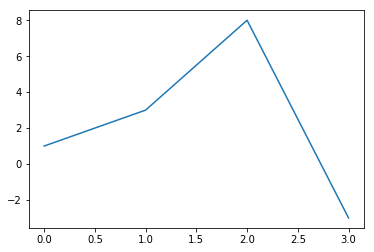

In [72]:
plt.ioff() # turn off interactive mode
plt.plot([1, 3, 8, -3])
plt.show()

Neat!

The topmost abstraction layer of Matplotlib consists of **pyplot** and **pylab**. Pyplot provides a state machine interface (behaves like a FSM) to the underlying object oriented interface (lower level interface). The OO interface is very powerful and provides lot of customization options.

Pylab is a module that just import pyplot and numpy in a single namespace. This was done to provide a MATLAB like experience to users. Now, this module has been depricated because of namespace pollution.

## Terminologies

[![terminologies][1]][1]

1. Anything that can be drawn on canvas is called an **Artist**.
2. Artists may have **child artists** which are also drawable.
3. The root artist (having no parent artist) is known as the **figure**.
4. A figure may have zero or more **Axes** (also called **subplots**). 
5. Axes in turn contain two/three **Axis** objects (that represent the actual x, y, z axes).

[1]: https://matplotlib.org/_images/anatomy.png

## Basic code

Above we plotted 4 data points with 2 lines of code. Let's explore the pyplot API a bit more. Each call to [plot][1] plots a new data set. Let's make a call to plot with `x` arguments as well.

Docs for all functions in pyplot are available [here][2].

[1]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
[2]: https://matplotlib.org/api/pyplot_summary.html

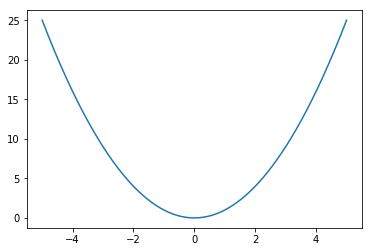

In [73]:
a = np.linspace(-5, 5, 1000)
plt.plot(a, a ** 2) # a: x coordinates of data points, a ** 2: y coordinates 
plt.show()

We got ourselves a nice parabola here!

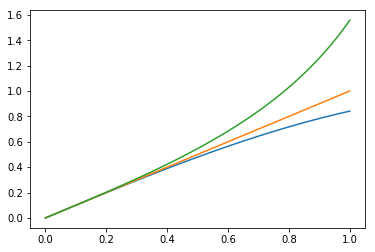

In [74]:
a = np.linspace(0, 1, 100)
plt.plot(a, np.sin(a))
plt.plot(a, a)
plt.plot(a, np.tan(a))
plt.show() # sinx < x < tanx for all x in (0,1]

This can be also be done in one line as follows.

In [75]:
plt.plot(a, np.sin(a), a, a, a, np.tan(a))
plt.grid(True) # enables grid
plt.axis()

(-0.05, 1.05, -0.07787038623274511, 1.6352781108876475)

We can change the [axis][1] scale, limits etc. using [axis][1], [xlim][2], etc.

[1]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html#matplotlib.pyplot.axis
[2]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html#matplotlib.pyplot.xlim

In [76]:
plt.axis([-0.5, 1.8, -0.5, 1.8])

[-0.5, 1.8, -0.5, 1.8]

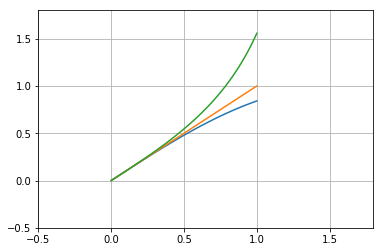

In [77]:
plt.show()

These graphs without the usual `x-axis` and `y-axis` written near the axes look relatively dull. Also, there's no title for the plot. What about the legend that tell which color means what? 

Let's fix that. We'll use [xlabel][1], [ylabel][2], [legend][3], [title][4].

[1]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel
[2]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel
[3]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend
[4]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title

In [78]:
plt.plot(a, np.sin(a), label = 'sin(x)')
plt.plot(a, a, label = 'x')
plt.plot(a, np.tan(a), label = 'tan(x)')
plt.legend(loc = 'best')
plt.title("Just a lousy title")
plt.axis('equal')
plt.grid(True)
plt.xlabel('X axis ->')
plt.ylabel('Y axis ->')

Text(0,0.5,'Y axis ->')

Moving on to saving ([savefig][1]) this beautiful graph. A fascinating property about `savefig` is that it can accept a "file like" object. We can therefore pass a [socket object][2] and send the image over a tcp connection.

[1]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig
[2]: https://docs.python.org/3.7/library/socket.html#socket-objects

In [79]:
import os

image_dir = "images/"
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
plt.savefig(image_dir + 'simple_graph.png') # format depends on extension

The image is saved in the `images` directory.
[![alt][1]][1]

[1]: images/simple_graph.png

In [80]:
plt.clf() # clear the plot

### Matplotlib Configuration files

Matplotlib lets users specify global, local, directory [configuration files][1] to configure various properties of matplotlib. These properties include (but are not limited to): interactive mode, line-width, color, backend, font, savefig.dpi, etc.  

[1]: https://matplotlib.org/users/customizing.html#matplotlib-rcparams

### Exploring Pyplot

Each data point is called a **marker** and they are connected by **lines** in between them. Until now, we've been using the default point markers to plot. Although, we can customize them greatly (see [this][1]).

We can once again use `plt.plot` with custom fmt (format) strings (see [notes section][2]).

[1]: https://matplotlib.org/api/markers_api.html?highlight=marker#module-matplotlib.markers
[2]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

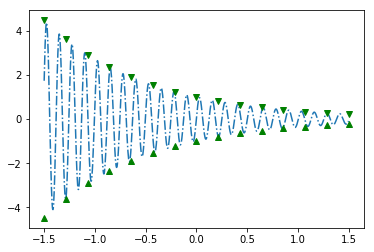

In [81]:
x = np.linspace(-1.5, 1.5, 1000)
plt.plot(x, np.exp(-x) * np.sin(50 * x), '-.')
x = np.linspace(-1.5, 1.5, 15)
plt.plot(x, np.exp(-x), 'gv', x, -np.exp(-x), 'g^')
plt.show()

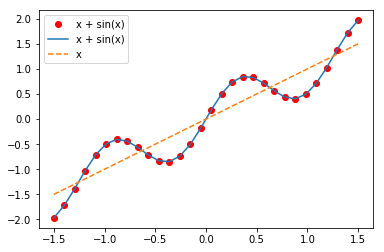

In [82]:
x = np.linspace(-1.5, 1.5, 30)
plt.plot(x, x + np.sin(5 * x) / 2, 'ro', x, x + np.sin(5 * x) / 2, x, x, '--')
plt.legend(['x + sin(x)'] * 2 + ['x'])
plt.show()

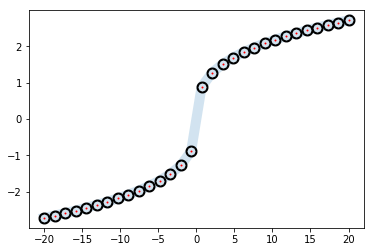

In [83]:
# Finer control
x = np.linspace(-20, 20, 30)
plt.plot(x, np.cbrt(x), alpha=0.2, linewidth=10)
plt.plot(x, np.cbrt(x), 'ro', markeredgecolor='black', markeredgewidth=10, markersize=2)
plt.show()

We also customize the **ticks** that are visible on the axes.

In [84]:
plt.plot(x, x ** 2)
locs, label = plt.xticks()
locs, label

(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 11 Text xticklabel objects>)

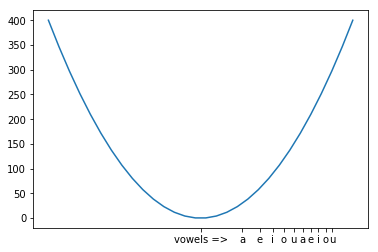

In [85]:
plt.xticks((np.arange(11) * 30) ** 0.5, ['vowels =>'] + ['a','e','i','o','u'] * 2)
plt.show()

### Different plot types

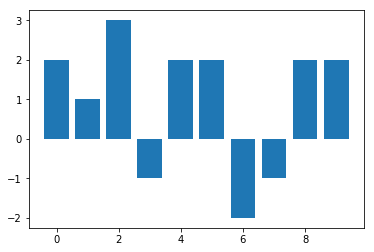

In [86]:
# Bar chart
plt.bar(np.arange(10), np.random.randint(-2, 5, 10))
plt.show()

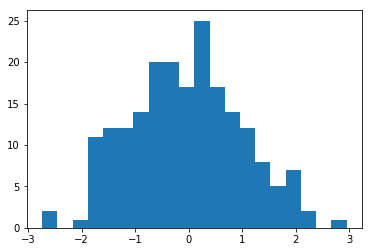

In [87]:
# histogram
plt.hist(np.random.randn(200), 20)
plt.show()

Use `density=True` to return a normalized probability density for the input data.

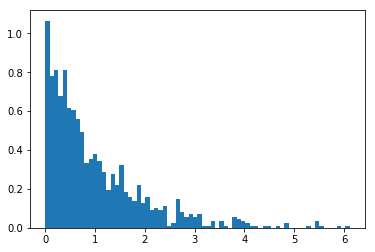

In [88]:
plt.hist(np.random.standard_exponential(1000), 70, density=True)
plt.show()

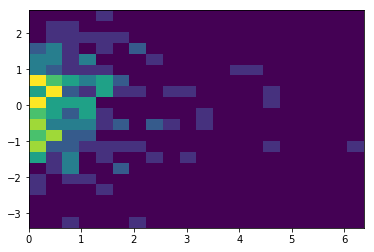

In [89]:
# 2d histogram
plt.hist2d(np.random.standard_exponential(200), np.random.randn(200), bins=[20, 20])
plt.show()

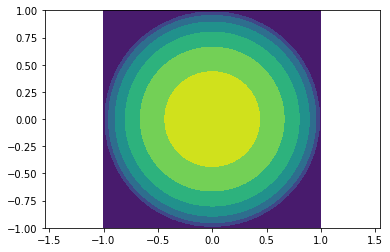

In [90]:
# contour plots
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = 1 - x**2 - y**2
z[z < 0] = 0
z = np.sqrt(z)
plt.contourf(x, y, z) # use contour to draw lines
plt.axis('equal')
plt.show()

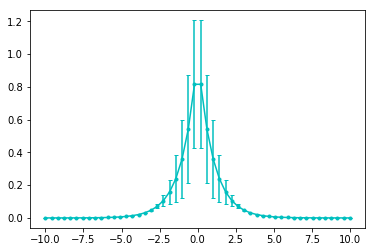

In [91]:
# error bars
x = np.linspace(-10, 10, 50)
y = np.hstack((np.exp(x[x<0]), np.exp(-x[x>0])))
xerr = stats.norm.pdf(x)
plt.errorbar(x, y, xerr, capsize=2, fmt='c.-')
plt.show()

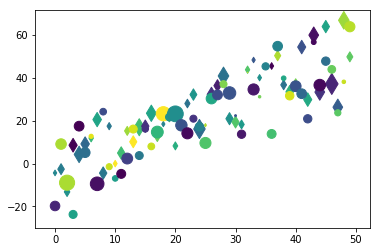

In [92]:
# scatter plots
def get_data():
    data = {'a': np.arange(50),
            'c': np.random.randint(0, 50, 50),
            's': np.random.randn(50)}
    data['b'] = data['a'] + 10 * np.random.randn(50)
    data['s'] = np.abs(data['s']) * 100
    return data

plt.scatter('a', 'b', c='c', s='s', marker='d', data=get_data())
plt.scatter('a', 'b', c='c', s='s', marker='o', data=get_data())
plt.show()

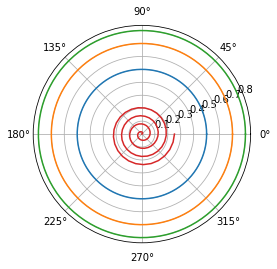

In [93]:
# polar plots
theta = np.linspace(0, 2 * np.pi, 100)
plt.polar(theta, 0.5 * np.ones(100), theta, 0.7 * np.ones(100),
          theta, 0.8 * np.ones(100))
plt.polar(theta * 4, theta / 25 )
plt.show()

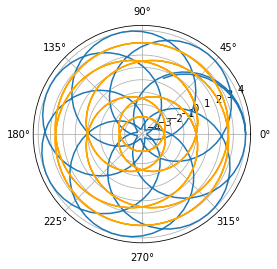

In [94]:
theta = np.arange(39, step=0.1)
plt.polar(theta, 4 * np.cos(64 * theta))
plt.polar(theta, 3 * np.sin(theta / 3), theta, -3 * np.sin(theta / 3), color='orange')
plt.show()

### Text, annotations and arrows

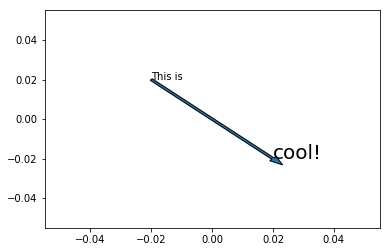

In [95]:
plt.plot()
plt.text(-0.02, 0.02, "This is")
plt.text(0.02, -0.02, "cool!", withdash=True, fontsize=20)
plt.arrow(-0.02, 0.02, 0.04, -0.04)
plt.show()

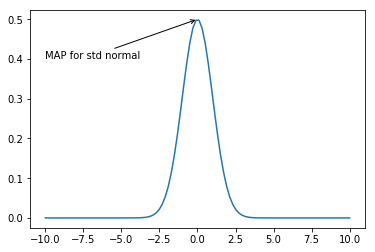

In [96]:
# annotate
x = np.linspace(-10, 10, 100)
plt.plot(x, np.exp(-(x**2)/2) / 2)
plt.annotate("MAP for std normal", (0, 0.5), (-10, 0.4),
            arrowprops={"arrowstyle":'->'})
plt.show()

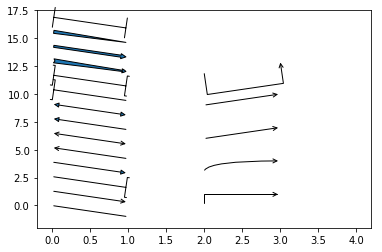

In [97]:
# different arrow types
styles = ['-', '->', '-[', '-|>', '<-', '<->',
              '<|-', '<|-|>', ']-', ']-[', 'fancy',
              'simple', 'wedge', '|-|']
conns = ["angle", "angle3", "arc", "arc3", "bar"]
for i, style in enumerate(styles):
    i = 1.3 * i
    plt.annotate("", xytext=(0, i), xy=(1, i-1), 
                 arrowprops=dict(arrowstyle=style))
for i, conn in enumerate(conns):
    i = 3 * i
    plt.annotate("", xytext=(2, i), xy=(3, i+1),
                 arrowprops=dict(arrowstyle='->', connectionstyle=conn))
plt.axis([-0.2, 4.2, -2, 17.5])
plt.show()

### Exploring Object Oriented Interface of Matplotlib

The *pythonic way* to use Matplotlib while *programming* is by using the **OO Interface**. For interactive and small sessions, one can resort to using pyplot.

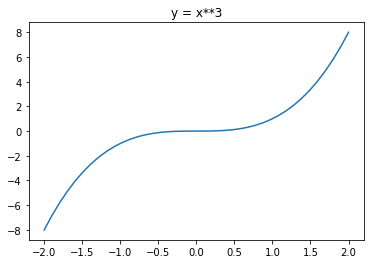

In [98]:
# hello world code
x = np.linspace(-2, 2, 40)
fig = plt.figure() # returns a figure where we can add axes
ax = fig.add_subplot(1, 1, 1) # adds 1 axes by default to subplot and return it
line1, = plt.plot(x, x ** 3) # returns list of lines in the plot
t = ax.set_title('y = x**3')
plt.show()

We need to know which matplotlib objects represent what part of figure.
1. [FigureCanvas][1]: Container class for a Figure instance. It represents the area onto which the figure is drawn.
2. [Figure][2]: Top level container for all elements of plot.
3. [Axes][3]: It is the rectangular area that contains most of figure's elements like [Axis][5], [Tick][6], [Line2D][7], [Text][8], etc. 
4. [Events][4]: Deals with events like mouse events, key events, etc.

[1]: https://matplotlib.org/api/backend_bases_api.html#matplotlib.backend_bases.FigureCanvasBase
[2]: https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure
[3]: https://matplotlib.org/api/axes_api.html
[4]: https://matplotlib.org/api/backend_bases_api.html#matplotlib.backend_bases.Event
[5]: https://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis
[6]: https://matplotlib.org/api/axis_api.html#matplotlib.axis.Tick
[7]: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
[8]: https://matplotlib.org/api/text_api.html#matplotlib.text.Text

We see that the [plot][1] function returns a list of Line2D. We can now customize everything related to the line using this reference. Remember how we had to pass the color of the line in the plot function itself.

[1]: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

#### Multiple Axes

[fig.add_subplot][1] takes `nrows`, `ncols` and `index` as parameters (among others) and returns the current `Axes` specified by the argument `index` (starts at 1 at top left). It prepares a grid of plots (Axes).

Because of its `add_subplot(pos, **kwargs)` signature, we can specify the three arguments above as a three digit number `pos`. For this to work each of them must be less than 10.

[fig.subplots][2] works almost the same way. Although, it returns a list of `Axes` rather than the current `Axes`.

Also, see that `Axes` class has plotting methods very similar to the ones in `pyplot` module.

[1]: https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot
[2]: https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.subplots
[3]: https://matplotlib.org/api/axes_api.html#plotting

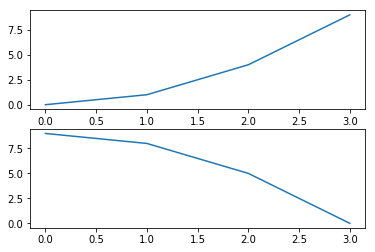

In [99]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(np.arange(4), np.arange(4) ** 2) # Axes.plot is totally similar to pyplot.plot
ax2 = fig.add_subplot(212) # returns the already made subplot, this behavior is deprecated
ax2.plot(np.arange(4), 9 - np.arange(4) ** 2)
plt.show()

#### Multiple Figures

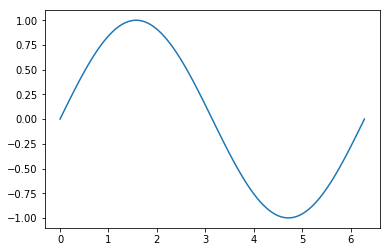

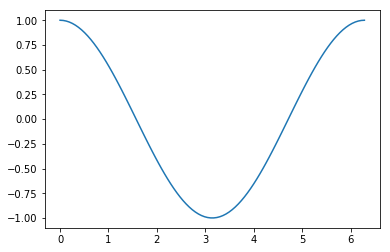

In [100]:
fig1 = plt.figure() # 1st figure
fig2 = plt.figure() # generates second figure
ax1 = fig1.subplots()
x = np.linspace(0, 2 * np.pi, 100)
ax1.plot(x, np.sin(x), label='sin(x)')
ax2 = fig2.subplots()
ax2.plot(x, np.cos(x), label='cos(x)')
plt.show()